In [5]:
import os,sys,time
import cv2
from PIL import Image
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

In [1]:
pic_folder=r'E:\Open_pics\FlightAttendance'
pic_list=[pic for pic in os.listdir(pic_folder) if pic.endswith('.jpg') or pic.endswith('.png') or pic.endswith('.jpeg')]
webp_list=[pic for pic in os.listdir(pic_folder) if pic.endswith('.webp')]
plt.figure(figsize=(20,10))
im=Image.open(os.path.join(pic_folder,webp_list[0]))
img_array=np.asarray(im)
im.save(os.path.join(pic_folder,webp_list[0].replace('.webp','.jpg')))

NameError: name 'os' is not defined

In [17]:
def webp_to_jpg(pic_folder):
    for pic in os.listdir(pic_folder):
        if pic.endswith('.webp'):
            im=Image.open(os.path.join(pic_folder,pic))
            im.save(os.path.join(pic_folder,pic.replace('.webp','.jpg')))

In [19]:
webp_to_jpg(pic_folder)

In [21]:
p0='https://www.xrmn02.top/uploadfile/202303/14/40181529947.webp'
os.path.basename(p0)

'40181529947.webp'

In [2]:
import subprocess,os

def ffmpeg_cut_mp4(input_file, output_file, start_time, duration):
    """
    使用FFmpeg从源媒体中剪切视频。

    参数:
    input_file (str): 输入视频文件的路径。
    output_file (str): 输出视频文件的路径。
    start_time (str): 剪切开始时间，格式为 "HH:MM:SS"。
    duration (str): 剪切持续时间，格式为 "HH:MM:SS"。
    """
    command = [
        'ffmpeg',
        '-i', input_file,
        '-ss', start_time,
        '-t', duration,
        '-c', 'copy',
        output_file
    ]
    subprocess.run(command, check=True)


In [4]:
input_folder=r'J:\XImgs'
input_mp4='J:\XImgs\Game.of.Thrones.S05E07.mp4'
folder,filename=os.path.split(input_mp4)
output_file=os.path.join(input_folder,os.path.splitext(filename)[0]+'_cut.mp4')
start_time='00:40:00'
duration='00:3:40'
ffmpeg_cut_mp4(input_mp4, output_file, start_time, duration)

In [5]:
def ffmpeg_extract_frames(video_path, output_folder,fps=10):
    # 确保输出文件夹存在
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 构建FFmpeg命令
    command = [
        'ffmpeg',
        '-i', video_path,  # 输入视频文件
        '-vf', f'fps={fps}',  # 每秒提取一帧
        os.path.join(output_folder, 'frame_%04d.png')  # 输出文件名格式
    ]

    # 执行FFmpeg命令
    subprocess.run(command, check=True)

In [6]:
video_path = os.path.abspath(r'J:\XImgs\Game.of.Thrones.S05E07_cut.mp4')
output_folder = os.path.join(os.path.dirname(video_path), 'frames')
ffmpeg_extract_frames(video_path, output_folder,10)

In [21]:
# get all pic name
def get_IMG_list(dir: str, filelist: list):
    """
    find all image file in the dir
    :param dir: path to gallery
    :return:
    """
    for root, dirs, files in os.walk(dir):
        for file in files:
            if file.endswith(('.bmp', '.webp', '.png', '.jpg', '.jpeg')):
                filelist.append(os.path.join(root, file))
    return filelist 

In [22]:
pic_folder=r'E:\Open_pics\FlightAttendance'
pic_list=[pic for pic in os.listdir(pic_folder) if pic.endswith('.jpg') or pic.endswith('.png') or pic.endswith('.jpeg')]
webp_list=[pic for pic in os.listdir(pic_folder) if pic.endswith('.webp')]
img_list=get_IMG_list(pic_folder,pic_list)


4325


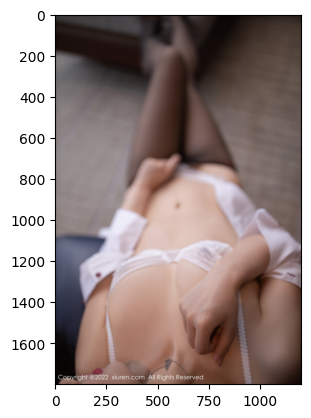

In [28]:
total_pic=len(img_list)
random_1=np.random.randint(0,total_pic)
img=Image.open(os.path.join(pic_folder,pic_list[random_1]))
img_array=np.asarray(img)
plt.imshow(img_array)

In [38]:
def select_imgs(img_list,n):
    """select n random imgs from img_list
    image shoud have hight > width
    
    Args:
        img_list (_type_): _description_
        n (_type_): _description_
    """
    random_imgs=[]
    while len(random_imgs)<n:
        random_1=np.random.randint(0,len(img_list))
        img=Image.open(os.path.join(pic_folder,img_list[random_1]))
        img_array=np.asarray(img)
        if img_array.shape[0]>img_array.shape[1]:
            random_imgs.append(img_list[random_1])
    return random_imgs

def resize_img_height(img_name,height:int=1800):
    img=Image.open(os.path.join(pic_folder,img_name))
    img_array=np.asarray(img)
    img_height,img_width=img_array.shape[:2]
    ratio=img_height/img_width
    new_width=int(height/ratio)
    img=img.resize((new_width,height))
    return img

def combine_imgs_by_H(img_list,height:int=1800):
    """combine three images into one    """
    imgs=[]
    for img_name in img_list:
        img=Image.open(os.path.join(pic_folder,img_name))
        img_norm=resize_img_height(img_name,height)
        imgs.append(img_norm)
    # combine the three images into one
    combined_img=np.concatenate(imgs,axis=1)
    return combined_img

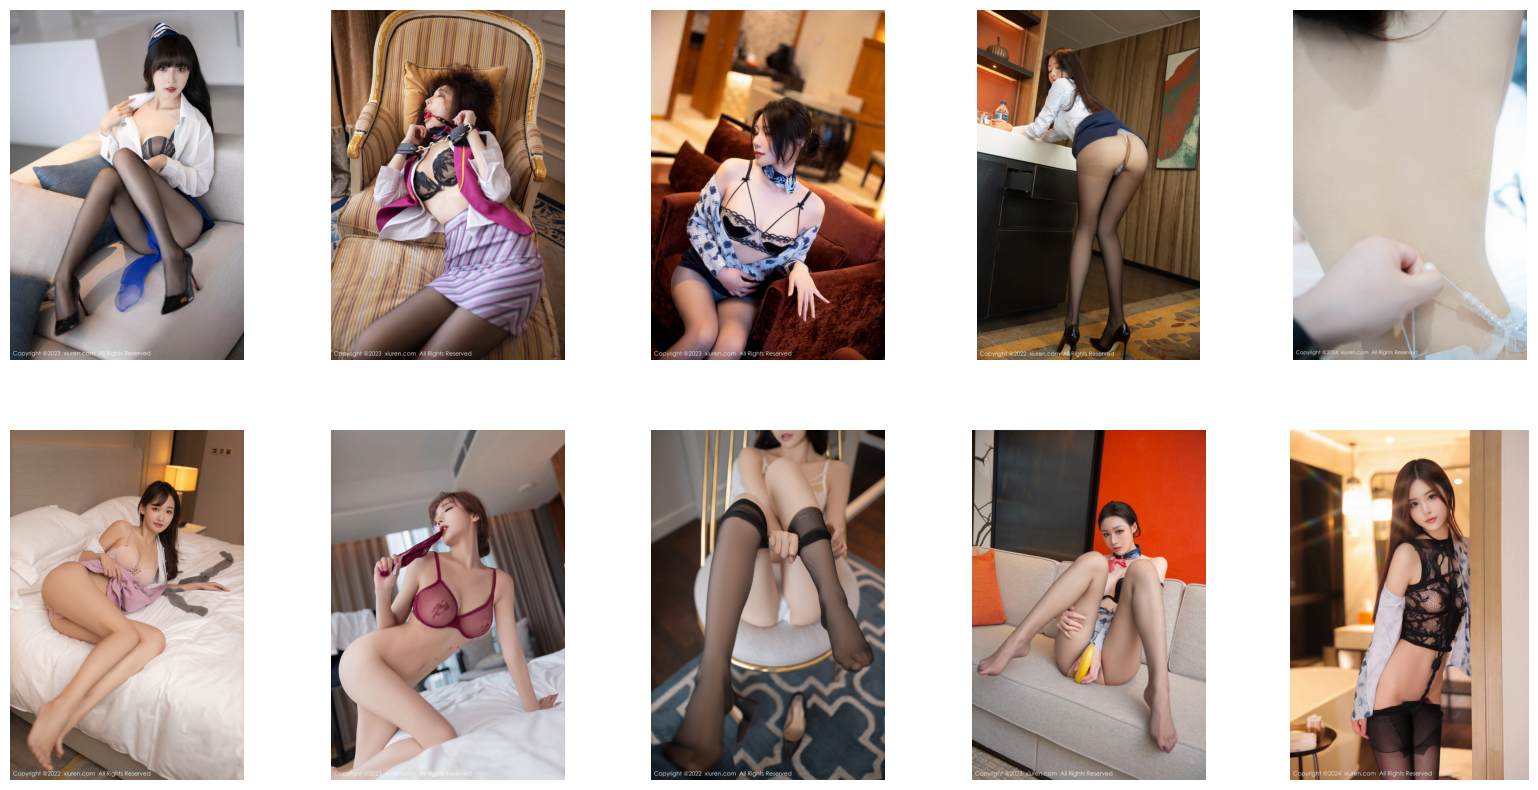

In [45]:
random_imgs=select_imgs(img_list,10)
# show all the images in plot
fig,axs=plt.subplots(2,5,figsize=(20,10))
for i in range(10):
    img=Image.open(os.path.join(pic_folder,random_imgs[i]))
    img_array=np.asarray(img)
    axs[i//5,i%5].imshow(img_array) 
    axs[i//5,i%5].axis('off')
plt.show()

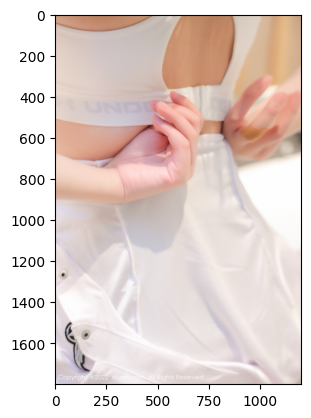

In [36]:
random_imgs=select_imgs(img_list,1)
# resize the image to 1800 in height

img=resize_img_height()(random_imgs[0])
img_array=np.asarray(img)
plt.imshow(img_array)

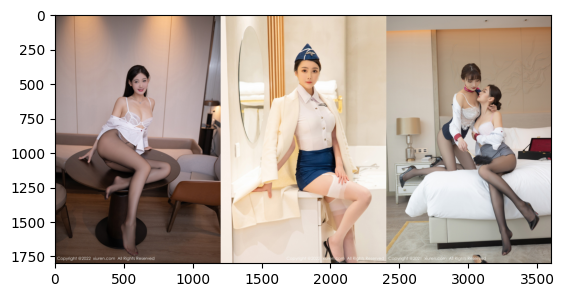

In [43]:
random_imgs=select_imgs(img_list,3)
# combine the three images in width into one

combined_img=combine_imgs_by_H(random_imgs)
plt.imshow(combined_img)
# save the combined image to the folder
plt.imsave("../img/combined_img2.jpg",combined_img)